In [5]:
!git clone https://github.com/ultralytics/yolov5.git
    

Cloning into 'yolov5'...


In [6]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'
print('done')

done


In [2]:
model=torch.hub.load('ultralytics/yolov5','yolov5s')   #installing the package yolov5  and the model small yolov5

Using cache found in C:\Users\ASUS/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-3-4 torch 1.10.2+cpu CPU

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [12]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

In [8]:
img=cv2.imread('Desktop/manyFiles/easyocr/cars.jpg')

In [9]:
pred=model(img)

In [36]:
#Dertemining Number of cars
no_of_cars=0
for i in range(len(pred.pandas().xyxy[0]['name'].index)):
    if pred.pandas().xyxy[0]['name'][i] in ['car','truck']:
        no_of_cars += 1
print(no_of_cars)

30


In [31]:
len(pred.pandas().xyxy[0]['name'].index)

30

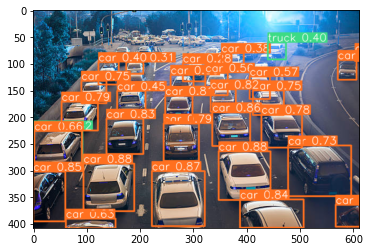

In [11]:
%matplotlib inline
plt.imshow(np.squeeze(pred.render()))
plt.show()

In [8]:
plt.show()

<ipython-input-8-1eb00ff78cf2>:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [17]:
pred.show()

In [24]:
import numpy as np
from numpy import asarray

In [73]:
#Testing the pretrained model
cat=cv2.VideoCapture(1)
newvid1=[]
size=(0,0)
while cat.isOpened():
    
    ret,frame =cat.read()
    if ret == False:
        break
    height,width,layers=frame.shape
    if len(newvid1) <1:
        size=(height,width)
    result=model(frame)
    newvid1.append(np.squeeze(result.render()))
    if len(newvid1) > 500:
        break
    cv2.imshow('Godsons Masterpiece',np.squeeze(result.render()))
    if cv2.waitKey(10) & 0xFF == ord('I'):
        break
cat.release()
cv2.destroyAllWindows()
    

In [64]:
import time

In [74]:
len(newvid1)

52

In [75]:
print(size)
print(newvid1[0])

(480, 640)
[[[179 124  88]
  [154 120  87]
  [130 118  90]
  ...
  [120  55  25]
  [119  50  22]
  [119  50  22]]

 [[255 245 192]
  [255 239 204]
  [178 154 138]
  ...
  [117  52  22]
  [119  50  22]
  [121  52  24]]

 [[234 204 177]
  [228 197 179]
  [148 116 107]
  ...
  [117  53  22]
  [119  53  23]
  [121  55  25]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  3   0   0]
  ...
  [ 62  46  28]
  [ 58  43  26]
  [ 61  47  30]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 65  45  34]
  [ 65  45  34]
  [ 65  45  33]]

 [[  0   0   0]
  [  0   0   0]
  [  1   0   0]
  ...
  [ 65  44  34]
  [ 65  45  35]
  [ 65  45  35]]]


In [76]:
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)

In [79]:
#Saving a object detected video
fourcc = cv2.VideoWriter_fourcc('X','V','I','D')
out = cv2.VideoWriter('out123.avi', fourcc, 2.0, (640,480))

In [80]:
for i in range(len(newvid1)):
    out.write(newvid1[i])
out.release()

In [53]:
print(newvid1)

[array([[[100, 111, 103],
        [100, 119, 108],
        [ 97, 125, 111],
        ...,
        [225, 171, 137],
        [223, 167, 135],
        [221, 164, 133]],

       [[101, 128, 121],
        [101, 131, 122],
        [ 94, 129, 116],
        ...,
        [222, 175, 146],
        [221, 175, 147],
        [221, 175, 147]],

       [[ 87, 129, 121],
        [ 85, 129, 119],
        [ 82, 125, 115],
        ...,
        [219, 175, 146],
        [218, 180, 149],
        [218, 180, 149]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 16,  13,  10],
        [ 17,  13,   9],
        [ 17,  13,   9]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 15,  14,  14],
        [ 15,  13,  13],
        [ 17,  15,  15]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 17,  12,  10],
        [ 19,  13,  11],
        [ 18,  12,  10]

In [16]:
for i in range(len(newvid1)):
    result=newvid1[i]
    cv2.imshow('Godsons Masterpiece',np.squeeze(result.render()))
    time.sleep(0.07)
    if cv2.waitKey(10) & 0xFF == ord('I'):
        break
cv2.destroyAllWindows()

In [16]:
import uuid


In [14]:
image_path=os.path.join('Data','images')
no_imgs=20

In [16]:

impaths=[['Data/video1.mp4','awake'],['Data/video2.mp4','drowsy']]

for impath,label in impaths:
    print(impath)
    print(label)
    

Data/video1.mp4
awake
Data/video2.mp4
drowsy


In [ ]:
#testing the pretrained yolov5 model
impaths=[['Data/video1.mp4','awake'],['Data/video2.mp4','drowsy']]

for impath,label in impaths:
    cap=cv2.VideoCapture(impath)
    print('Collecting data for {}'.format(label))
    
    
    i=0
    while cap.isOpened():
        i += 1
        print('Collecting data for {}'.format(i))
        ret,frame=cap.read()
        cv2.imshow('Godson',frame)
        if i > 400:
            break
        if ret == False:
            break
        
        if i>200 and i%10 == 0:
            imagname=os.path.join(image_path,label+'.'+str(uuid.uuid1())+'.jpg')
            cv2.imwrite(imagname,frame)
       
        if cv2.waitKey(10) & 0xFF == ord('I'):
            break
    cap.release()
    cv2.destroyAllWindows()
        



In [43]:
#used to label training data
!git clone https://github.com/tzutalin/labelImg.git

Cloning into 'labelImg'...


In [19]:
cap1.release()
cv2.destroyAllWindows()

In [ ]:
#Training a custom model

In [25]:
!D: && cd Data Ml/project Luna/yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data Dataset.yml --weights yolov5s.pt

Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)
module 'signal' has no attribute 'SIGALRM'


train: weights=yolov5s.pt, cfg=, data=Dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  2022-2-26 torch 1.10.2+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0,

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 1/1 [00:01<00:00,  1.52s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 1/1 [00:01<00:00,  1.52s/it]
                 all         20          0          0          0          0          0

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/2 [00:00<?, ?it/s]
     3/499        0G         0  0.004646         0         0       320:   0%|          | 0/2 [00:05<?, ?it/s]
     3/499        0G         0  0.004646         0         0       320:  50%|#####     | 1/2 [00:05<00:05,  5.54s/it]
     3/499        0G    0.0386  0.005138   0.02153         1       320:  50%|#####     | 1/2 [00:07<00:05,  5.54s/it]
     3/499        0G    0.0386  0.005138   0.02153         1       320: 100%|##########| 2/2 [00:07<00:00,  3.23s/it]
     3/499        0G    0.0386  0.005138   0.02153         1       320

    97/499        0G         0 0.0008373         0         0       320:  50%|#####     | 1/2 [00:08<00:06,  6.54s/it]
    97/499        0G         0 0.0008373         0         0       320: 100%|##########| 2/2 [00:08<00:00,  3.73s/it]
    97/499        0G         0 0.0008373         0         0       320: 100%|##########| 2/2 [00:08<00:00,  4.15s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/1 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 1/1 [00:01<00:00,  1.76s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 1/1 [00:01<00:00,  1.76s/it]
                 all         20          1    0.00327          1     0.0175    0.00524

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/2 [00:00<?, ?it/s]
    98/499        0G   0.08233  0.001521  0.007016   

  0%|          | 0/2 [00:00<?, ?it/s]
   210/499        0G   0.06469  0.001656  0.004058         1       320:   0%|          | 0/2 [00:06<?, ?it/s]
   210/499        0G   0.06469  0.001656  0.004058         1       320:  50%|#####     | 1/2 [00:06<00:06,  6.61s/it]
   210/499        0G   0.03234  0.001111  0.002029         0       320:  50%|#####     | 1/2 [00:08<00:06,  6.61s/it]
   210/499        0G   0.03234  0.001111  0.002029         0       320: 100%|##########| 2/2 [00:08<00:00,  3.80s/it]
   210/499        0G   0.03234  0.001111  0.002029         0       320: 100%|##########| 2/2 [00:08<00:00,  4.22s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/1 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 1/1 [00:01<00:00,  1.77s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 1/1 [00:01<00:


  0%|          | 0/2 [00:00<?, ?it/s]
   222/499        0G   0.09423  0.001489  0.008133         2       320:   0%|          | 0/2 [00:06<?, ?it/s]
   222/499        0G   0.09423  0.001489  0.008133         2       320:  50%|#####     | 1/2 [00:06<00:06,  6.81s/it]
   222/499        0G   0.04712  0.001013  0.004067         0       320:  50%|#####     | 1/2 [00:08<00:06,  6.81s/it]
   222/499        0G   0.04712  0.001013  0.004067         0       320: 100%|##########| 2/2 [00:08<00:00,  3.88s/it]
   222/499        0G   0.04712  0.001013  0.004067         0       320: 100%|##########| 2/2 [00:08<00:00,  4.32s/it]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/1 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 1/1 [00:01<00:00,  1.68s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 1/1 [00:01<00

In [17]:
model4= torch.hub.load('ultralytics/yolov5','custom',path='last.pt')

Using cache found in C:\Users\ASUS/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-3-4 torch 1.10.2+cpu CPU

Fusing layers... 
Model Summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [3]:
model3

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

In [21]:
#Test data
imgd=cv2.imread('Data/images/awake.81e986c9-992a-11ec-8a1e-94e97931d5fa.jpg')
imga=cv2.imread('happy7.jpg')

In [18]:
#Object detection  video captured from camera
cat=cv2.VideoCapture(0)
frames=[]
while cat.isOpened():
    ret,frame =cat.read()
    if not ret:
        break
    result=model4(frame)
    cv2.imshow('Godsons Masterpiece',np.squeeze(result.render()))
    if cv2.waitKey(10) & 0xFF == ord('I'):
        break
    frames.append(result)
    
cat.release()
cv2.destroyAllWindows()
    
    
   
   